# read data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

bmw_data = pd.read_json('Trips-Output.json')

# end_soc_kwh = state of charge (soc) in kilowatt / hour (kwh) at the end of the trip (end)
# end_soc_perc = soc in percent (perc) at the end
# end_time = unix time (time) at the end
# end_x_ind = x coordinate of the vehicle as an ind (x_ind) at the end
# end_y_ind = y coordinate of the vehicle as an ind (y_ind) at the end
# start_soc_kwh = soc in kwh at the start of the trip (start)
# start_soc_perc = soc in perc at the start
# start_time = time at the start
# start_x_ind = x_ind at the start
# start_y_ind = y_ind at the start
# vehicle_type = indicator if a vehicle is either a plug-in hybrid electric vehicle (PHEV) or a battery electric vehicle (BEV)
# vin = vehicle identification number

In [91]:
df = pd.DataFrame(columns=['charging_station_loc', 'parking_time'])
for i in range(bmw_data['vin'].max()+1):
    
    #take data of each vehicle and sort them by start_time
    vin_data=bmw_data[bmw_data['vin']==i].sort_values(by='start_time')
  
    length=len(vin_data)
    pehv_total_charge_increased = 0
    bev_total_charge_increased = 0
    pehv_total_time = 0
    bev_total_time = 0
    count=0;
   
    for index, row in vin_data.head(length).iterrows():
        
        #count is set to 0 initially, when the first row is encountered do no comparison, 
        # just save this row to prev_row
        if count==0:
            prev_row = row
            count=1
        
        #if current rows start location is same as prev_row's end location and the charging percentage is increased
        # in the current row data, that means there was a charging session
        else:
            if(row['start_x_ind'] == prev_row['end_x_ind'] and row['start_y_ind'] == prev_row['end_y_ind'] 
               and row['start_soc_kwh'] > prev_row['end_soc_kwh']):
#                 print(row['start_x_ind'], row['start_y_ind'], row['start_time'] - prev_row['end_time'], 
#                       row['start_soc_kwh'] - prev_row['end_soc_kwh'], "kwh,",
#                       row['start_soc_perc'] - prev_row['end_soc_perc'], "%,",
#                       row['vehicle_type'] )
                
                charging_station_loc = str(row['start_x_ind'])+','+ str(row['start_y_ind'])
                parking_time = (row['start_time'] - prev_row['end_time']).total_seconds() / 3600                                                        
                new_row = pd.DataFrame([[charging_station_loc, parking_time]], columns=['charging_station_loc', 'parking_time'])
                df = df.append(new_row, ignore_index=True)
                prev_row = row


218 94 2 days 18:09:34 0.4299999999999997 kwh, 0.0 %, PHEV
0 72 0 days 00:35:44 0.02999999999999936 kwh, 0.0 %, PHEV
55 498 0 days 02:19:03 0.16000000000000014 kwh, 0.0 %, PHEV
23 22 0 days 01:01:16 0.6300000000000008 kwh, 0.0 %, PHEV
24 322 0 days 00:03:01 0.010000000000000675 kwh, 0.0 %, PHEV
394 56 0 days 05:24:33 6.580000000000001 kwh, 58.0 %, PHEV
3723 4329 0 days 00:07:08 0.019999999999999574 kwh, 0.0 %, PHEV
95 315 0 days 06:58:37 7.42 kwh, 76.0 %, PHEV
17 2642 7 days 17:55:41 7.359999999999999 kwh, 67.0 %, PHEV
200 1546 10 days 04:40:32 8.280000000000001 kwh, 89.0 %, PHEV
263 786 21 days 23:04:28 1.8500000000000014 kwh, 4.5 %, PHEV
24 403 75 days 21:44:13 0.3200000000000003 kwh, 4.0 %, PHEV
151 174 12 days 16:01:02 0.2699999999999996 kwh, 4.0 %, PHEV
1335 1092 0 days 07:12:09 9.5 kwh, 81.5 %, PHEV
95 398 0 days 07:34:46 6.029999999999999 kwh, 50.5 %, PHEV
4106 393 177 days 03:09:36 3.68 kwh, 35.5 %, PHEV
834 931 26 days 22:56:04 5.04 kwh, 51.5 %, PHEV
51 106 160 days 00:28:19 0

   charging_station_loc  parking_time
0                218,94     66.159444
1                  0,72      0.595556
2                55,498      2.317500
3                 23,22      1.021111
4                24,322      0.050278
5                394,56      5.409167
6             3723,4329      0.118889
7                95,315      6.976944
8               17,2642    185.928056
9              200,1546    244.675556
10              263,786    527.074444
11               24,403   1821.736944
12              151,174    304.017222
13            1335,1092      7.202500
14               95,398      7.579444
15             4106,393   4251.160000
16              834,931    646.934444
17               51,106   3840.471944
18              495,214   1862.400000
19              495,214   1283.065833
20             1384,210   1533.262222
21              495,214   1028.150278
22              478,515     21.852222
23              285,346     22.712500
24            2544,1809      0.461111
25          

<AxesSubplot:xlabel='charging_station_loc'>

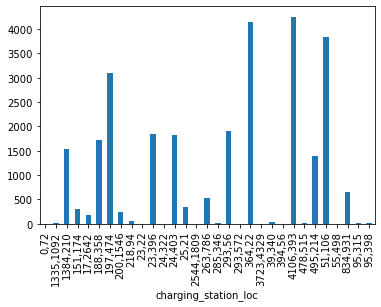

In [96]:
print(df)
#plot the charging stations and their average charging times
df.groupby('charging_station_loc').parking_time.mean().plot(kind = "bar")
